# Classes and Objects

In [2]:
# include the required modules

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

A very useful programming concept of modern programming is object oriented programming. 

In all the programs we wrote till now, we have designed our program around functions i.e. blocks of statements which manipulate data. This is called the procedure-oriented way of programming. 

There is another way of organizing your program which is to combine data and functionality and wrap it inside something called an object. This is called the object oriented programming paradigm, which will be useful especially for larger programs.

Classes and objects are the two main aspects of object oriented programming. 

* A class creates a new type where objects are instances of the class. 

* Objects can store data using ordinary variables that belong to the object. Variables that belong to an object or class are referred to as properties. Objects can also have functionality coming from functions that belong to a class and are called methods.

* Properties are of two types - they can belong to each instance/object of the class or they can belong to the class itself. They are called instance variables and class variables respectively.


## Definition of Classes

We create a new class using the `class` statement and the name of the class and a colon `:`. This is followed by an indented block of statements which form the body of the class.

~~~
class Class_name:
    statements ###    
~~~
    
In the following example, we have an empty block which is indicated using the pass statement.

In [1]:
class Colloid:
    pass  # An empty block

You can then create a new object of the class Colloid by 
The print command will just inform you about the memory address at which the object is stored.

In [5]:
p = Colloid()
print(p)

## Class Methods

Methods are functions that belong to a class. 


<div class="alert alert-info">

**Note:** The self class
   
Class methods have an extra first parameter at beginning of the parameter list, but you do not give a value for this parameter when you call the method, Python will provide it. This particular variable refers to the object itself, and by convention, it is given the name `self`. Thus, even a method without arguments has a single argument:
 
~~~
class Colloid:
    def type(self):
        print('I am a plastic colloid')

~~~

</div>

In [1]:
class Colloid:
    def type(self):
        print('I am a plastic colloid')

p = Colloid()
p.type()

b=Colloid()
b.type()

I am a plastic colloid
I am a plastic colloid


### The `__init__` method

The `__init__` method is run as soon as an object of a class is instantiated (i.e. created). The method is useful to do any initialization (i.e. passing initial values to your object) you want to do with your object. Notice the double underscores both at the beginning and at the end of the name.

In [37]:
class Colloid:
    
    def __init__(self, R):
        self.R = R 
        
    def get_size(self):
        return(self.R)
    
    

In [38]:
p=Colloid(5)
b=Colloid(2)

In [39]:
print('Colloid radius is {} µm '.format(str(b.get_size())))

Colloid radius is 2 µm 


Besides the `__init__`method, which is commonly called `constructor`, there is also the `__del__` method, which is called b´when an object is deleted. We will use that further down.

### The `__str__` method

The `__str__` method that is invoked when a simple string representation of the class is needed, as for example when printed.

In [28]:
class Colloid:
    
    def __init__(self, R):
        self.R = R 
        
    def get_size(self):
        return(self.R)
    
    def __str__(self):
        return('I am a plastic colloid of radius %.1f' % (self.R))

In [29]:
p=Colloid(5)

In [30]:
print(p)

I am a plastic colloid of radius 5.0


## Class and object variables

The data part, i.e. properties, are ordinary variables that are bound to the namespaces of the classes and objects. This means that these names are valid within the context of these classes and objects only.

There are two types of fields - `class variables` and `object variables` which are classified depending on whether the class or the object owns the variables respectively.

* **Class variables** are shared - they can be accessed by all instances of that class. There is only one copy of the class variable and when any one object makes a change to a class variable, that change will be seen by all the other instances.

* **Object variables** are owned by each individual object/instance of the class. In this case, each object has its own copy of the field i.e. they are not shared and are not related in any way to the field by the same name in a different instance.

Here is an example:

In [72]:
class Colloid:

    number = 0 # definition of a class variable
    
    def __init__(self, R):
        self.R = R 
        Colloid.number=Colloid.number+1

        
    def __del__(self):
        Colloid.number=Colloid.number-1

In [62]:
# create a particle with radius 4
p1=Colloid(4)

# create a second particle with radius 10
p2=Colloid(10)


In [63]:
# print the radius of both particles
print(p1.R,p2.R)

4 10


In [64]:
# print the particle number 
print(p1.number, p2.number)

2 2


In [ ]:
# delete one particle object and print the 
del(p2)

<div class="alert alert-info">

**Physics interlude** Colloidal particle class
   
We will define now a class for a colloidal particle. This makes sense, as we can have different colloidal particles of different radius for example, which do start to carry out Brownian motion from different positions. 
The particle class shall keep track of 
    
    * the total number of colloidal particles
    * the value of k_B T/(6 pi eta) = 2.2e-19 
    
The class shall provide the class specific methods
    
    * how_many() which returns the total number of colloids
    * __str__ which returns a string with radius and position of the particle

    Each object shall then contain the following properties
    
    * the particle radius, R
    * the x position, x
    * the y position, y
    * the index of the colloid, index
    * the diffusion coefficient given by k_B T/(6 pi eta R), D
    
The object shall provide the following methods
    
    * get_size() return the radius
    * get_D() return the diffusion coefficient
    * update(dt) do one step of Brownian motion with a time step dt as argument, return the new x and y
    
</div>

In [ ]:

# Class definition
class Colloid:

    # A class variable, counting the number of Colloids
    number = 0
    f = 2.2e-19 # this is k_B T/(6 pi eta) in m^3/s

    # constructor
    def __init__(self,R, x0=0, y0=0):        
        # add initialisation code here
        self.R=R
        self.x=x0
        self.y=y0
        Colloid.number=Colloid.number+1
        self.index=Colloid.number 
        self.D=Colloid.f/self.R

    
    # method to return the name 
    def get_size(self):
        return(self.R)
    
        
    def get_D(self):        
        return(self.D)
    
    def update(self,dt):
        self.x=self.x+np.random.normal(0.0, np.sqrt(2*self.D*dt))
        self.y=self.y+np.random.normal(0.0, np.sqrt(2*self.D*dt))
        return(self.x,self.y)
    
    # class method accessing a class variable
    @classmethod
    def how_many(cls):
        return(Colloid.number)
    
    # insert something that prints the particle position in a formatted way when printing
    def __str__(self):
        return("The particle with radius R={} is at x={},y={}.".format(self.R, self.x, self.y))

With the help of this Colloid class, we would like to carry out simulations of Brownian motion of multiple particles. The simulations shall

* take n=200 particles
* have N=100 trajectory points each
* start all at 0,0
* store all x and y positions in a 2D array [n,N]
* each particle object should be stored in a list p


In [67]:
N=100 # the number of trajectory points
n=200# the number of particles
x=np.zeros([n,N])
y=np.zeros([n,N])
x[:,0]=0
y[:,0]=0

p_list=[]

# creating all objects 
for i in range(n):
    p_list.append(Colloid(1e-6,x[i,0],y[i,0]))

    
# simulate all trajectory timesteps for all particles    
for i in range(1,N):
    for (index,p) in enumerate(p_list):
        x[index,i],y[index,i]=p.update(0.18)    



As a result you shall be able to plot, for example, all data points of the trajectories as shown below.

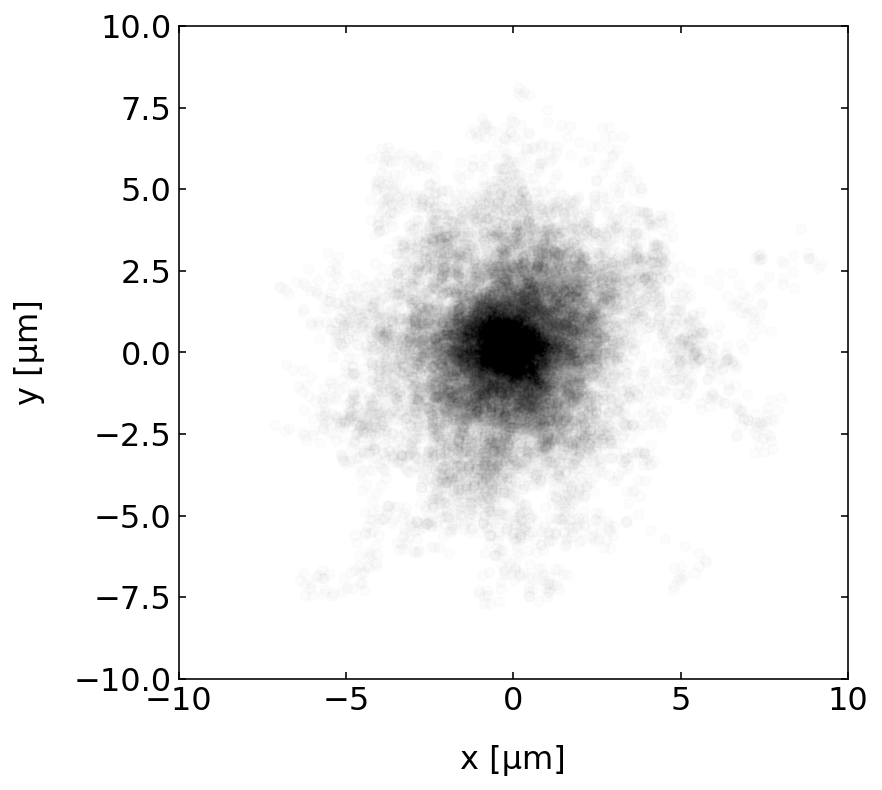

In [74]:
scale=1e6

plt.figure(figsize=(6,6))
for i in range(n):
    plt.plot(x[i,:]*scale,y[i,:]*scale,'k.',alpha=0.01,lw=0)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.show()